###### This exercise aims to make you comfortable with the basic image processing tools and libraries. This exercise will serve as a starting point before you dive deep into the course.

In [38]:
import numpy as np                 # numpy library useful for most of the mathematical operations
import matplotlib.pyplot as plt    # useful for data visualization/plotting purpose. Can also be used for image visualization.
import matplotlib.image as mpimg
import cv2 as cv
from scipy.ndimage import rotate
# For this exercise, we will restrict ourselves to matplotlib only. Please note that other libraries such as PIL, OpenCV
# can also be used as image processing libraries.

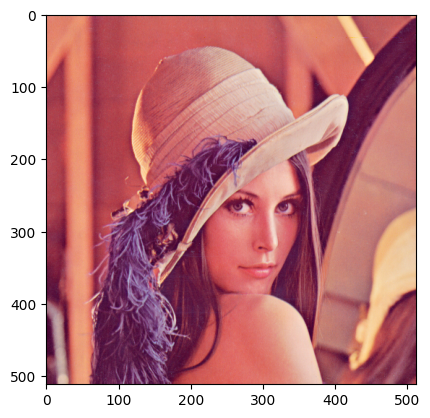

In [3]:
image = plt.imread("lena.png")
plt.imshow(image)

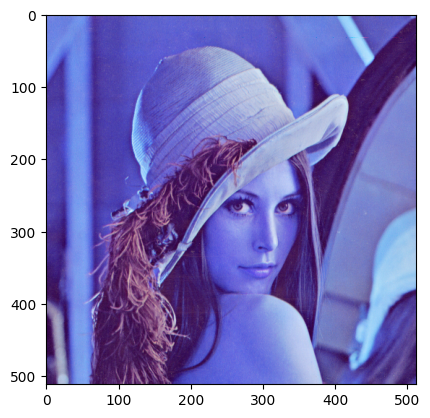

In [4]:
imgg = cv.imread('lena.png')
plt.imshow(imgg)

In [ ]:
# cv.imread
# - support image formats - PNG, JPEG, TIFF
# - read image as Numpy array with uint8 type
# - represent pixel values from 0 - 255
# - For colour images, returns images in BGR format
# -

# plt.imread
# - support image formats - PNG, JPEG
# - Reads images as floating-point arrays
# - pixel values normalized between 0 and 1
# - Reads images in RGB order directly.



# 1. Image Information

###### Task1.1 : write code to find image dimension and print it

In [5]:
image.shape

(512, 512, 3)

In [6]:
print(image.shape)

(512, 512, 3)


- Yes, this indicates an image with three color channels.
- Each pixel in the image has three values corresponding to these color channels.
- Aspect ratio of a rectangle is the ratio of its longer side to its shorter side—the ratio of width to height, when the rectangle is oriented as a landscape.
- Aspect ratio = width/height = 512/512 = 1

In [7]:
width, height, channel = image.shape
aspect_ratio = width / height
print("Aspect ratio : " ,aspect_ratio)

Aspect ratio :  1.0


###### Task1.2:  Visualization of each channel

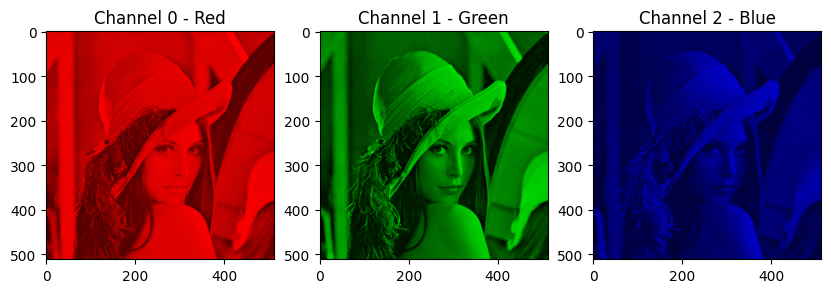

In [8]:
def VisualizeChannel(image,channel):
    '''
    This function is helpful to visualize a specific channel of an RGB image.
    image: RGB image
    channel: channel, one wish to visualize (can take value 0 (for red), 1(green), 2(blue))
    '''
    #write your code here
    output = np.zeros_like(image)
    output[:,:,channel] = image[:,:,channel]

    return output    # 'output' is image's particular channel values

image = mpimg.imread('lena.png')  # Load the image using matplotlib
fig, axis = plt.subplots(1, 3, figsize=(10, 5))

titles = ['Channel 0 - Red', 'Channel 1 - Green', 'Channel 2 - Blue']

for i, channel_to_display in enumerate(range(3)):
  output = VisualizeChannel(image, channel_to_display)

  axis[i].imshow(output)
  axis[i].set_title(titles[channel_to_display])

plt.show()


In [9]:
# min and max intensity values for each channel
for channel_to_display in range(3):
    min_val = np.min(image[:, :, channel_to_display])
    max_val = np.max(image[:, :, channel_to_display])

    print(f'{titles[channel_to_display]}: Min Intensity = {min_val}, Max Intensity = {max_val}')


Channel 0 - Red: Min Intensity = 0.21176470816135406, Max Intensity = 1.0
Channel 1 - Green: Min Intensity = 0.0117647061124444, Max Intensity = 0.9725490212440491
Channel 2 - Blue: Min Intensity = 0.0313725508749485, Max Intensity = 0.8823529481887817


# 2. Intensity Manipulations

###### Task2.1: RGB to Gray  

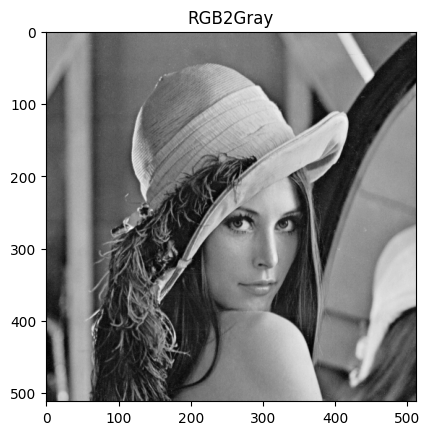

In [10]:
def RGB2Gray(image):
    '''
    This function converts an RGB image to grayscale
    image: RGB image
    '''
    #write you code here and visualize the result
    gray = np.dot(image[..., :3],[0.3, 0.59, 0.11]) # Weighted method or luminosity method
    # image[..., :3]:Selects all the rows and columns of the image but only the 1st 3 channels (R,G,and B).
    return gray       #'gray' is grayscale image, converted from RGB image

image = plt.imread('lena.png')
gray_image = RGB2Gray(image)

plt.imshow(gray_image, cmap='gray')
plt.title('RGB2Gray')
plt.show()

###### Task2.2 : Gray to Binary

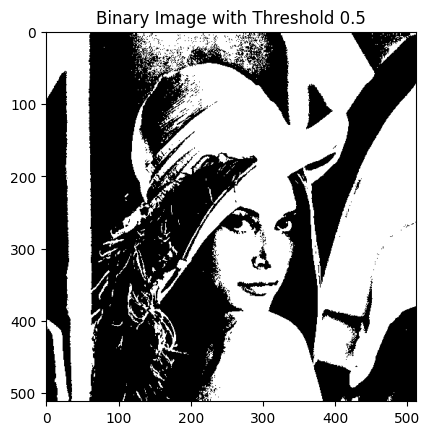

In [11]:
def Gray2Binary(image,T):
    '''
    This function converts a gray image to binary based on the rule stated above.
    image: image (can be RGB or gray); if the image is RGB, convert it to gray first
    T: Threshold
    '''

    #check if image is RGB if yes, convert it to gray
    flag = len(image.shape)
    if flag == 3:
    # i.e. RGB image, hence to be converted to gray
    # write code to convert it to gray or you can call function "RGB2Gray" defined in task2.1
      gray = np.dot(image[..., :3],[0.3, 0.59, 0.11])
    else:
      gray = image

    #Write code to threshold image based on the rule stated above and return this binarized image (say it 'bimage')
    bimg = np.where(gray > T, 1, 0) # Pixel greater than T are set to 0, otherwise 0

    #write code to visualize the resultant image
    plt.imshow(bimg, cmap ='gray')
    plt.title(f'Binary Image with Threshold {T}')
    plt.show()

    return bimg

input_image = plt.imread('lena.png')
threshold = 0.5

binary_image = Gray2Binary(input_image, threshold)

######  Task2.3:  Crop a 5*5 section of a gray image

In [31]:
def ImageCrop(image, r0, c0):
    '''
    This function crops a 5x5 rectangular patch defined by image coordinates (r0, c0), (r0, c0+5), (r0+5, c0), and (r0+5, c0+5)
    of an image.
    image: Image can be RGB or grayscale
    r0: starting row index
    c0: starting column index
    '''
    # Check if the input is RGB; if so, convert it to grayscale
    if len(image.shape) == 3:  # RGB image has 3 channels
        gray = np.dot(image[..., :3], [0.3, 0.59, 0.11])
    else:
        gray = image

    # Select 5x5 rectangular patch
    patch = gray[r0:r0+5, c0:c0+5]

    # Visualize the patch and print its value
    plt.imshow(patch, cmap='gray')
    plt.title('Cropped 5x5 Patch')
    plt.show()

    print("Cropped Patch Values:")
    print(patch)

    return patch

input_image = plt.imread('lena.png')
r0, c0 = 200, 200  # Starting row and column index

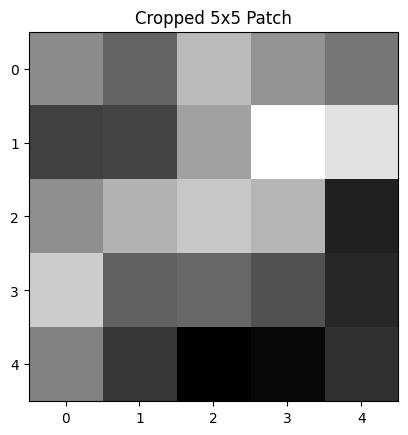

Cropped Patch Values:
[[0.30160785 0.28266667 0.32270589 0.30443138 0.29105883]
 [0.2662353  0.2677255  0.31129412 0.35505883 0.34129413]
 [0.30254902 0.31913726 0.32901961 0.32058824 0.25101961]
 [0.33176472 0.28121569 0.28466667 0.27411765 0.25458824]
 [0.29658824 0.26184314 0.23607844 0.23945099 0.25847059]]
[[0.30160785 0.28266667 0.32270589 0.30443138 0.29105883]
 [0.2662353  0.2677255  0.31129412 0.35505883 0.34129413]
 [0.30254902 0.31913726 0.32901961 0.32058824 0.25101961]
 [0.33176472 0.28121569 0.28466667 0.27411765 0.25458824]
 [0.29658824 0.26184314 0.23607844 0.23945099 0.25847059]]


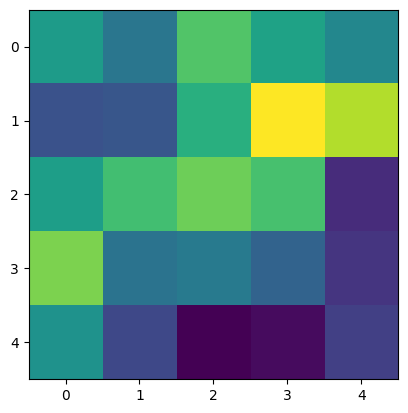

In [32]:
patch = ImageCrop(image,r0,c0)
print(patch)
plt.imshow(patch)

[[0.15080392 0.14133334 0.16135295 0.15221569 0.14552941]
 [0.13311765 0.13386275 0.15564706 0.17752942 0.17064706]
 [0.15127451 0.15956863 0.1645098  0.16029412 0.12550981]
 [0.16588236 0.14060785 0.14233334 0.13705883 0.12729412]
 [0.14829412 0.13092157 0.11803922 0.11972549 0.1292353 ]]


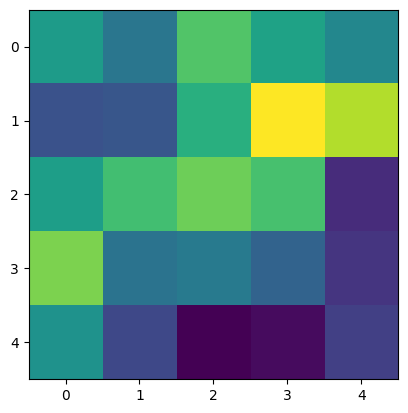

In [33]:
# multiplying patch by 0.5

patch_modified_1 = patch * 0.5
print(patch_modified_1)
plt.imshow(patch_modified_1)

[[0.60321569 0.56533334 0.64541179 0.60886275 0.58211765]
 [0.5324706  0.53545099 0.62258824 0.71011766 0.68258825]
 [0.60509805 0.63827451 0.65803922 0.64117647 0.50203923]
 [0.66352943 0.56243138 0.56933334 0.5482353  0.50917648]
 [0.59317648 0.52368629 0.47215688 0.47890197 0.51694119]]


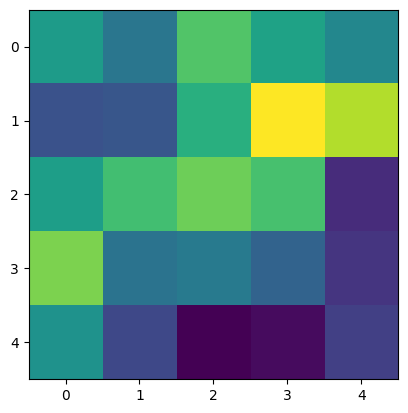

In [34]:
# multiplying patch by 2

patch_modified_2 = patch * 2
print(patch_modified_2)
plt.imshow(patch_modified_2)

Random Patch:
[[0.49513669 0.80614249 0.18243694 0.36143329 0.35653704]
 [0.71196605 0.62850966 0.12659415 0.54700756 0.47415075]
 [0.24523173 0.91551325 0.01562771 0.08050965 0.38610513]
 [0.33211773 0.97265657 0.7257101  0.18954925 0.33639755]
 [0.39590909 0.21642763 0.38488674 0.47052074 0.85714194]]

Patch after Addition:
[[0.64594062 0.94747582 0.34378989 0.51364898 0.50206646]
 [0.8450837  0.7623724  0.28224121 0.72453697 0.64479782]
 [0.39650624 1.07508188 0.18013751 0.24080377 0.51161493]
 [0.49800009 1.11326442 0.86804343 0.32660808 0.46369168]
 [0.54420321 0.34734921 0.50292596 0.59024623 0.98637724]]

Patch after Subtraction:
[[-0.34433277 -0.66480915 -0.02108399 -0.20921761 -0.21100763]
 [-0.5788484  -0.49464691  0.02905291 -0.36947814 -0.30350369]
 [-0.09395722 -0.75594462  0.1488821   0.07978447 -0.26059532]
 [-0.16623538 -0.83204873 -0.58337676 -0.05249043 -0.20910343]
 [-0.24761498 -0.08550606 -0.26684752 -0.35079525 -0.72790665]]


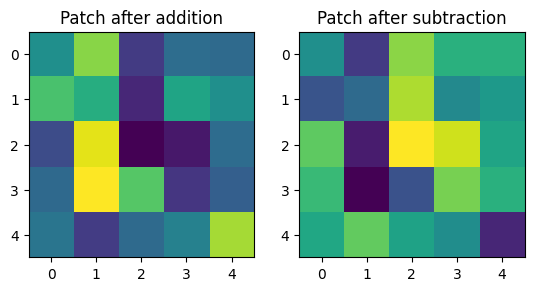

In [35]:
# create another random 5*5 patch (numpy array) and add/subtract it to the patch

random_patch = np.random.rand(5, 5)

# Display the random patch
print("Random Patch:")
print(random_patch)

added = patch_modified_1 + random_patch

# Subtract the random patch from the original patch
subtract = patch_modified_1 - random_patch

print("\nPatch after Addition:")
print(added)
plt.subplot(1,2,1)
plt.title("Patch after addition")
plt.imshow(added)

print("\nPatch after Subtraction:")
print(subtract)
plt.subplot(1,2,2)
plt.title("Patch after subtraction")
plt.imshow(subtract)

###### Task2.4: Uniform Brightness Scaling

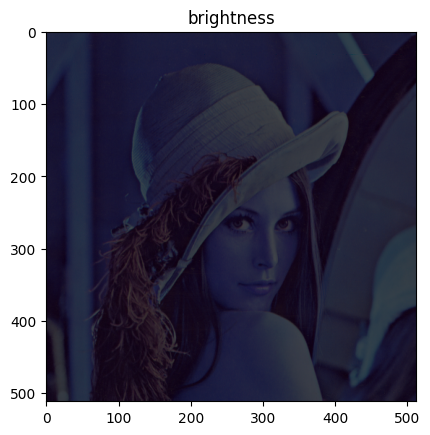

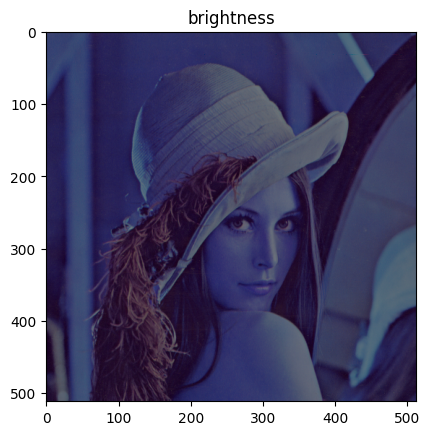

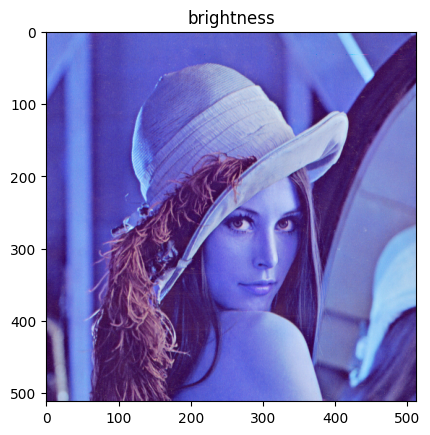

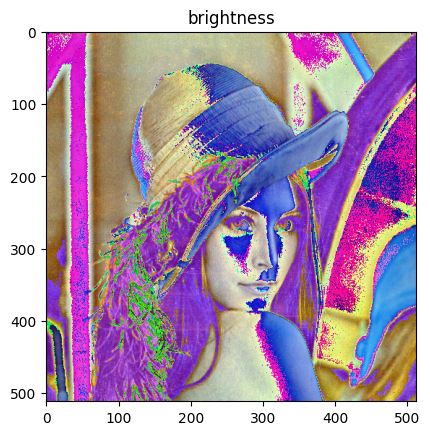

In [ ]:
def UniformBrightScaling(image,scale):
    '''
    This function uniformly increases or decreases the pixel values (of all image locations) by a factor 'scale'.
    image: image (can be RGB or gray image)
    scale: A scalar by which pixels'svalues need to be multiplied
    '''
    #write your code here
    output = image * scale
    output = np.clip(output , 0, 255) #ensure the image is within the valid range
    output = output.astype(np.uint8) #to display the image, convert the image to unint8 datatype.

    #display the resultant image
    plt.imshow(output, cmap ='gray')
    plt.title("brightness")
    plt.show()

    return output

image  = cv.imread('/content/lena.png')
scales = [0.3,0.5,1,2]
for scale in scales:
    result = UniformBrightScaling(image, scale)

In [ ]:
## Image normalization

# 3. Image Filtering

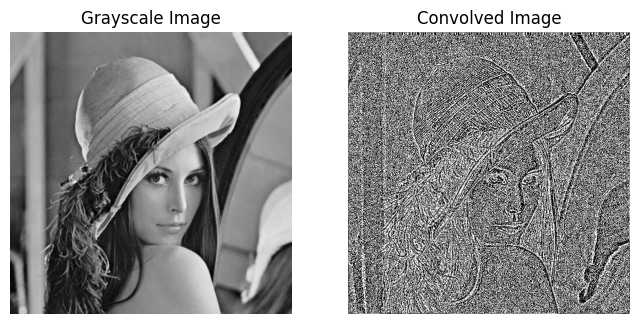

In [48]:
def feature_extractor(image, kernel):
    '''
    This function performs convolution operation on a gray image with a 3x3 kernel.
    image: image (can be RGB or gray); if RGB, convert it to gray
    kernel: 3x3 convolution kernel
    '''
    # Convert RGB to gray if input is RGB
    if len(image.shape) == 3:
        gray_scale = np.dot(image[..., :3], [0.3, 0.59, 0.11])
    else:
        gray_scale = image

    # Create a zero array of size (r, c) to store the resultant value at specific pixel locations
    r, c = gray_scale.shape
    output = np.zeros_like(gray_scale)

    # Create a zero array with size (r+2, c+2) for padding
    zero_array = np.zeros((r+2, c+2))

    # Copy gray image to the padded array
    zero_array[1:-1, 1:-1] = gray_scale

    # Convolve the image
    for row in range(r):
        for col in range(c):
            patch = zero_array[row:row+3, col:col+3]
            output[row, col] = np.sum(patch * kernel)

    return output

# Load the image and define the kernel
input_image = cv.imread('/content/lena.png', cv.IMREAD_GRAYSCALE)
kernel = np.array([[0, -1, 0],        # Sharpen kernel
                   [-1, 4, -1],
                   [0, -1, 0]])

convolution = feature_extractor(input_image, kernel)
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(input_image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(convolution, cmap='gray')
plt.title('Convolved Image')
plt.axis('off')

plt.show()


In [ ]:
## Note that the steps described above are to help you get started. You can follow other valid steps too. Result from all
 #of the method should be the same. Pseudocode is available at: https://en.wikipedia.org/wiki/Kernel_(image_processing)

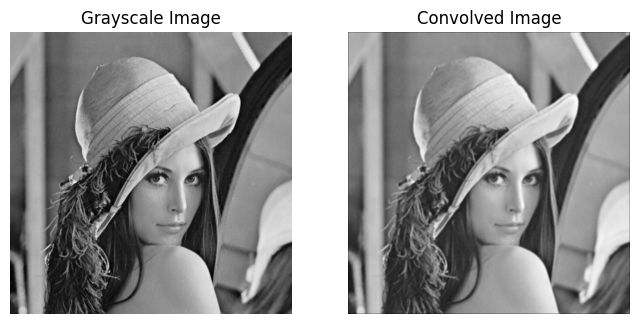

In [ ]:
input_image  = cv.imread('/content/lena.png', cv.IMREAD_GRAYSCALE)
kernel = np.array([[1/9, 1/9, 1/9],        #box blur
                   [1/9, 1/9, 1/9],
                   [1/9, 1/9, 1/9]])

convolution = feature_extractor(input_image , kernel)
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(input_image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(convolution, cmap='gray')
plt.title('Convolved Image')
plt.axis('off')

plt.show()

# 4.Geometric Transformation

###### Task4.1: Image Rotation (In-plane)

***Using inbuilt function***

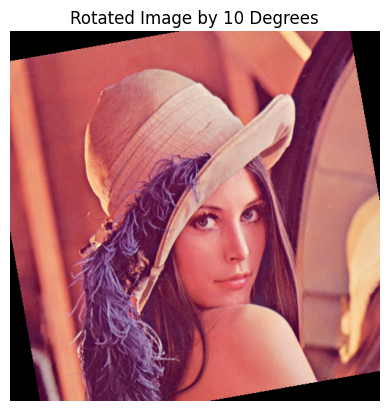

In [36]:
def Rotate_Image(image, angle=10):
    # Rotate the image
    rotated_image = rotate(image, angle, reshape=False)

    # To display the rotated image
    plt.imshow(rotated_image, cmap='gray'if len(rotated_image.shape) == 2 else None)
    plt.title(f"Rotated Image by {angle} Degrees")
    plt.axis('off')  # Hide axes for a cleaner display
    plt.show()

    return rotated_image

# Read the image using Matplotlib
image = plt.imread('/content/lena.png')

# Rotate the image by 10 degrees anticlockwise
rotated_image = Rotate_Image(image)


***Without using inbuilt function***

In [39]:
# Bilinear interpolation

# Xs, Ys are floating point coordinates in the source image for which the intensity has to be calculated.
def bilinear_interpolation(image, Xs, Ys):
  height, width = image.shape
  x_int = int(np.floor(Xs)) + 1
  y_int = int(np.floor(Ys)) + 1

  X2 = np.clip(x_int, 0, width - 1)
  Y2 = np.clip(y_int, 0, height - 1)

  # X1,Y1 and X2,Y2 are co-ordinates at the upper left and right neighbour resp.
  X1 = X2 - 1
  Y1 = Y2 - 1
  # distance
  a = Xs - X1
  b = Ys - Y1

  if (X1 >= 0 and X1 <= width and Y1 >= 0 and Y1 <= height):
    target_It = ((1 - b) * (1 - a) * image[Y1, X1]) + ((b) * (1 - a) * image[Y2, X1]) + ((1 - b) * (a) * image[Y1, X2]) + (b * a * image[Y2, X2])
  else:
    target_It = 0
  return target_It


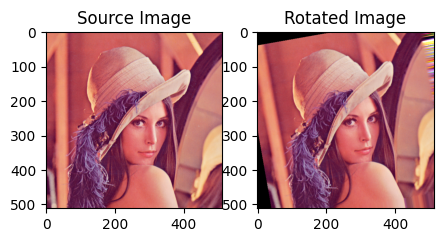

In [49]:
# Rotation

def rotate(image, theta):
  height, width = image.shape[:2] # extracting dimension
  padded_image = np.zeros_like(image) # new array padded with zeros
  x_center, y_center = width/2 , height/2 # image center
  theta *= np.pi/180 # theta in degree to radians

  for yt in range(height):
    for xt in range(width):
      x_translated = xt - x_center # co-ordinate relative to image center
      y_translated = yt - y_center
      Xs = np.cos(theta)*x_translated - np.sin(theta)*y_translated + x_center  #rotating the translated image and translating back
      Ys = np.cos(theta)*y_translated + np.sin(theta)*x_translated + y_center
      for channel in range(image.shape[2]):
        padded_image[yt,xt,channel] = bilinear_interpolation (image[:,:,channel], Xs, Ys)

  return padded_image

# read the imageṁ
lena = mpimg.imread("/content/lena.png")
rotated_lena = rotate(lena, 10)

# Plot the images
plt.figure(figsize=(5, 4))
plt.subplot(121).imshow(lena, cmap='gray')
plt.title('Source Image')
plt.subplot(122).imshow(rotated_lena, cmap='gray')
plt.title('Rotated Image')
plt.show()